In [ ]:
## Viewing the M101 Galaxy (also known as the Pinwheel Galaxy) using its .FITS file.

In [1]:
# Importing necessary libaries/modules
import numpy as np
import matplotlib.pyplot as mp
from astropy.io import fits

In [2]:
# To open the .fits file and make it ready for use
M101=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits')

In [3]:
M101     #This and following cells are just checks

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001A4C329E2B0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001A4C56324F0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A4C5632640>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001A4C5CA3DC0>]

In [4]:
M101.info()

Filename: F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [5]:
M101[0]

In [6]:
M101[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4554008724.25 / 1st row - Number of seconds since Nov 17 1858  
RA      =            211.05432 / 1st row - Right ascension of telescope boresigh
DEC     =            54.658262 / 1st row - Declination of telescope boresight (d
SPA     =             111.743  / 1st row - Camera col position angle wrt north (
IPA     =             307.42

In [7]:
M101[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [8]:
M101[2].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               210756 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    3 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [9]:
data = M101[0].data
data.shape

(1489, 2048)

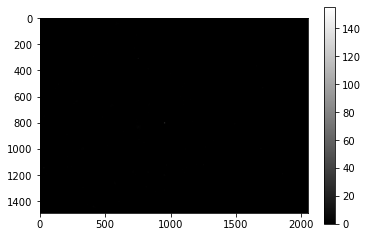

In [10]:
# To check the colourbar of the fits file in normal mapping
mp.imshow(data, cmap="gray")
mp.colorbar()

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

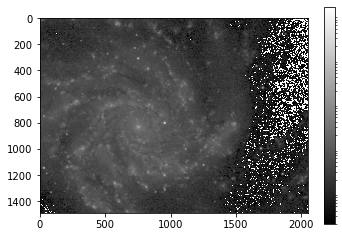

In [11]:
# Since normal mapping did not give any clear picture, we switch to lognormal distribution, for which the results are much more profound
from matplotlib.colors import LogNorm

mp.imshow(data, cmap='gray', norm=LogNorm())
cbar = mp.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [12]:
from astropy.visualization import make_lupton_rgb

In [13]:
M101u=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits')
M101g=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits')
M101r=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits')
M101i=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/M101/frame-u-003712-3-0187.fits')

In [14]:
g=M101g[0].data
r=M101r[0].data
u=M101u[0].data
i=M101i[0].data

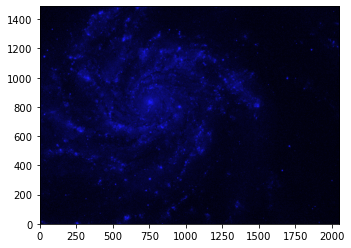

In [18]:
rgb_default = make_lupton_rgb(i,g,5*u,stretch=2.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('M101.jpg')

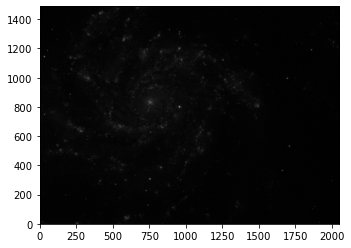

In [16]:
rgb_default = make_lupton_rgb(r,g,u,stretch=2.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('M101.jpg')

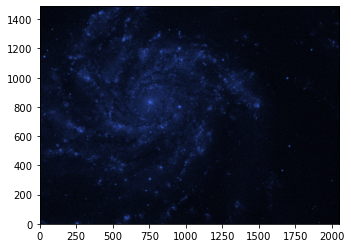

In [34]:
rgb_default = make_lupton_rgb(i/2.5,g/1.5,u*1.5,stretch=0.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('M101.jpg')

In [32]:
## make_lupton_rgb is a function taken from the AstroPy library whose purpose is to generate a plot of the rgb image by using 
## three numpy nd arrays, each containing the colour coding for red, green, and blue respectively (the three filters).
## Addtionally, these ndarrays can be scaled up or down to vary the intensity of the respective colour codes.
## Stretch parameter of this functions varies the brightness of the generated image
## Important to note is that make_lupton_rgb just generates the image, but not display. For displaying it, we use imshow().
## Also present as a comment is a line to save the final image as a .jpg file on the system. We can alter the path and save
## the file at any location that we want to, for which I have kept it as a comment line.